In [ ]:
#toinen uutisryhmäsetti luokiteltavaksi

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

#omaksi huviksi otetaan aikaa
from time import time
start_time = time()

categories_2 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.windows.x']

#kategoriat
ng_train = fetch_20newsgroups(subset='train', categories=categories_2,
                              remove=('headers', 'footers', 'quotes'))
ng_test = fetch_20newsgroups(subset='test', categories=categories_2,
                             remove=('headers', 'footers', 'quotes'))
target_names = ng_train.target_names 

#TF-IDF -vektorisointi
vectorizer = TfidfVectorizer()

#muunnetaan opetusaineisto fit_transform()-metodilla
#muunnetaan myös testiaineisto transform()-metodilla
X_train = vectorizer.fit_transform(ng_train.data)
X_test = vectorizer.transform(ng_test.data)
y_train, y_test = ng_train.target, ng_test.target

#perceptroni saa nyt luvan olla samassa solussa
pc = Perceptron(random_state=12501)
pc.fit(X_train, y_train)

y_score = pc.decision_function(X_train)
y_pred = pc.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Aikaa tässä meni: {:.2f}'.format(time() - start_time), ' s')


Aikaa tässä meni: 4.81  s


In [2]:
len(vectorizer.get_feature_names_out())

47529

In [3]:
#tulosten analysointia

print(f"Predict: {y_pred} and score: {y_score}")
print(f'Perceptron average test accuracy: {pc.score(X_test, ng_test.target)}')
print(confusion_matrix(ng_test.target, y_pred))  # verrataan toteutuneita arvoja ennusteisin
print(classification_report(ng_test.target, y_pred))

Predict: [0 2 1 ... 0 1 1] and score: [[-1.31317703  1.42450383 -0.48142589]
 [ 0.27738174 -0.15273205 -0.65001481]
 [-0.06661599  0.56812816 -0.26782462]
 ...
 [ 0.76452045 -0.56600803 -0.32726262]
 [ 0.92918643 -0.71946757 -0.03652812]
 [ 0.29653175 -0.42565509 -0.79318505]]
Perceptron average test accuracy: 0.732597623089983
[[297  47  45]
 [ 73 292  29]
 [ 68  53 274]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       389
           1       0.74      0.74      0.74       394
           2       0.79      0.69      0.74       395

    accuracy                           0.73      1178
   macro avg       0.74      0.73      0.73      1178
weighted avg       0.74      0.73      0.73      1178



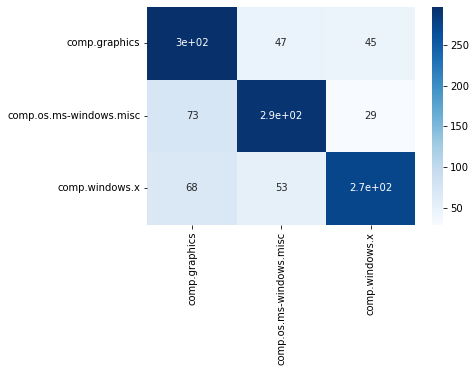

In [4]:
#sekaannusmatriisin piirtäminen
import seaborn as sns

labels = [target_names[0], target_names[1], target_names[2]]
ax = sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)